In [19]:
import pandas as pd
import numpy as np

#### 파일 불러옴

In [412]:
df_dal = pd.read_csv("data/아파트(매매)__실거래가_달서구.csv",encoding='euc-kr',skiprows=15, thousands=',')
df_soo = pd.read_csv("data/아파트(매매)__실거래가_수성구.csv",encoding='euc-kr',skiprows=15, thousands=',')

In [413]:
df_dal = df_dal.copy()
df_soo = df_soo.copy()

In [414]:
titles_dal = df_dal.columns
titles_dal

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명'],
      dtype='object')

In [415]:
titles_soo = df_soo.columns
titles_soo

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명'],
      dtype='object')

#### 필요한 열만 남김

In [416]:
#달서구
df_col_dal=df_dal[['시군구','번지','단지명','전용면적(㎡)','거래금액(만원)','계약년월']]
df_col_dal

,시군구,번지,단지명,전용면적(㎡),거래금액(만원),계약년월
0,대구광역시 달서구 감삼동,118-2,감삼맨션,58.7100,15000,202008
1,대구광역시 달서구 감삼동,Jan-40,감삼보성청실,50.8500,19000,202004
2,대구광역시 달서구 감삼동,Jan-40,감삼보성청실,50.8500,19800,202006
3,대구광역시 달서구 감삼동,201-2,감삼빌라트,76.0403,19700,202004
4,대구광역시 달서구 감삼동,201-2,감삼빌라트,76.0403,23500,202006
...,...,...,...,...,...,...
5384,대구광역시 달서구 호산동,350,삼성한국형,59.9140,18000,202008
5385,대구광역시 달서구 호산동,350,삼성한국형,84.9700,28700,202008
5386,대구광역시 달서구 호산동,350,삼성한국형,59.9140,19500,202008
5387,대구광역시 달서구 호산동,350,삼성한국형,84.9100,28300,202008


In [417]:
## 수성구
df_col_soo=df_soo[['시군구','번지','단지명','전용면적(㎡)','거래금액(만원)','계약년월']]
df_col_soo

,시군구,번지,단지명,전용면적(㎡),거래금액(만원),계약년월
0,대구광역시 수성구 노변동,440,노변대백,84.9500,34000,202005
1,대구광역시 수성구 노변동,440,노변대백,134.8600,42000,202006
2,대구광역시 수성구 노변동,440,노변대백,134.8600,37000,202007
3,대구광역시 수성구 노변동,440,노변대백,84.9500,33000,202007
4,대구광역시 수성구 노변동,440,노변대백,59.9700,20200,202007
...,...,...,...,...,...,...
3393,대구광역시 수성구 황금동,985,힐스테이트황금동,84.9258,86300,202008
3394,대구광역시 수성구 황금동,985,힐스테이트황금동,84.9094,84000,202008
3395,대구광역시 수성구 황금동,985,힐스테이트황금동,59.9776,63500,202008
3396,대구광역시 수성구 황금동,985,힐스테이트황금동,84.9094,85300,202008


#### 두개의 데이터 합침

In [418]:
df = pd.concat([df_col_dal, df_col_soo], ignore_index= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       8787 non-null   object 
 1   번지        8787 non-null   object 
 2   단지명       8787 non-null   object 
 3   전용면적(㎡)   8787 non-null   float64
 4   거래금액(만원)  8787 non-null   int64  
 5   계약년월      8787 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 412.0+ KB


## 2. 1) 정수값으로 변환

In [419]:
df['전용면적(㎡)'] = df['전용면적(㎡)'].astype(int)
df

,시군구,번지,단지명,전용면적(㎡),거래금액(만원),계약년월
0,대구광역시 달서구 감삼동,118-2,감삼맨션,58,15000,202008
1,대구광역시 달서구 감삼동,Jan-40,감삼보성청실,50,19000,202004
2,대구광역시 달서구 감삼동,Jan-40,감삼보성청실,50,19800,202006
3,대구광역시 달서구 감삼동,201-2,감삼빌라트,76,19700,202004
4,대구광역시 달서구 감삼동,201-2,감삼빌라트,76,23500,202006
...,...,...,...,...,...,...
8782,대구광역시 수성구 황금동,985,힐스테이트황금동,84,86300,202008
8783,대구광역시 수성구 황금동,985,힐스테이트황금동,84,84000,202008
8784,대구광역시 수성구 황금동,985,힐스테이트황금동,59,63500,202008
8785,대구광역시 수성구 황금동,985,힐스테이트황금동,84,85300,202008


### '구' 데이터 구별

In [420]:
df[['시도','구','동']] = df['시군구'].str.split(' ', n=2, expand=True)
df.head()

,시군구,번지,단지명,전용면적(㎡),거래금액(만원),계약년월,시도,구,동
0,대구광역시 달서구 감삼동,118-2,감삼맨션,58,15000,202008,대구광역시,달서구,감삼동
1,대구광역시 달서구 감삼동,Jan-40,감삼보성청실,50,19000,202004,대구광역시,달서구,감삼동
2,대구광역시 달서구 감삼동,Jan-40,감삼보성청실,50,19800,202006,대구광역시,달서구,감삼동
3,대구광역시 달서구 감삼동,201-2,감삼빌라트,76,19700,202004,대구광역시,달서구,감삼동
4,대구광역시 달서구 감삼동,201-2,감삼빌라트,76,23500,202006,대구광역시,달서구,감삼동


In [421]:
df = df[['구','동','전용면적(㎡)','거래금액(만원)','단지명','계약년월']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구         8787 non-null   object
 1   동         8787 non-null   object
 2   전용면적(㎡)   8787 non-null   int32 
 3   거래금액(만원)  8787 non-null   int64 
 4   단지명       8787 non-null   object
 5   계약년월      8787 non-null   int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 377.7+ KB


In [422]:
df['거래금액(만원)'] = df['거래금액(만원)'].astype(int)
df

<ipython-input-422-9596ca130f92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['거래금액(만원)'] = df['거래금액(만원)'].astype(int)


,구,동,전용면적(㎡),거래금액(만원),단지명,계약년월
0,달서구,감삼동,58,15000,감삼맨션,202008
1,달서구,감삼동,50,19000,감삼보성청실,202004
2,달서구,감삼동,50,19800,감삼보성청실,202006
3,달서구,감삼동,76,19700,감삼빌라트,202004
4,달서구,감삼동,76,23500,감삼빌라트,202006
...,...,...,...,...,...,...
8782,수성구,황금동,84,86300,힐스테이트황금동,202008
8783,수성구,황금동,84,84000,힐스테이트황금동,202008
8784,수성구,황금동,59,63500,힐스테이트황금동,202008
8785,수성구,황금동,84,85300,힐스테이트황금동,202008


In [423]:
df['count'] = 1

<ipython-input-423-6ff1b8d4f954>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


## 2. 2) 전용면적 데이터 순으로 나열

In [426]:
df_size = df.groupby('전용면적(㎡)').sum()
df_size = df_size.sort_values(by='count', ascending=False)
df_size = df_size['count']
df_size.head()

전용면적(㎡)
84     3253
59     1861
134     435
49      213
46      124
Name: count, dtype: int64

## 2. 3) 전영면적 데이터가 가장 많은 아파트(84m^2)만 추출

In [344]:
df_84 = df[df['전용면적(㎡)']==84]
df_84 = df_84[['구','동','거래금액(만원)','단지명']]
df_84

,구,동,거래금액(만원),단지명
10,달서구,감삼동,52950,삼정브리티시용산
12,달서구,감삼동,55350,삼정브리티시용산
14,달서구,감삼동,54000,삼정브리티시용산
18,달서구,감삼동,52600,삼정브리티시용산
22,달서구,감삼동,52500,삼정브리티시용산
...,...,...,...,...
8779,수성구,황금동,89000,힐스테이트황금동
8780,수성구,황금동,89500,힐스테이트황금동
8782,수성구,황금동,86300,힐스테이트황금동
8783,수성구,황금동,84000,힐스테이트황금동


## 2. 4-1) 아파트 단지별 평균 거래 금액

In [345]:
df_village = df_84.groupby('단지명').mean()
df_village

,거래금액(만원)
단지명,
(1197-20),33700.000000
e편한세상범어,64470.138889
가든하이츠1,86500.000000
가든하이츠3,84333.333333
강산타운,28725.000000
...,...
협화맨션,29957.692308
화산샬레,89375.000000
화성맨션,30690.909091


#### 수성구와 달서구 단지별 평균거래 금액

#### 수성구

In [346]:
soo = df_84[df_84['구']=='수성구']
soo

,구,동,거래금액(만원),단지명
5389,수성구,노변동,34000,노변대백
5392,수성구,노변동,33000,노변대백
5394,수성구,노변동,26800,노변대백
5397,수성구,노변동,48100,수성월드메르디앙
5398,수성구,노변동,43700,수성월드메르디앙
...,...,...,...,...
8779,수성구,황금동,89000,힐스테이트황금동
8780,수성구,황금동,89500,힐스테이트황금동
8782,수성구,황금동,86300,힐스테이트황금동
8783,수성구,황금동,84000,힐스테이트황금동


###  answer_ 수성구

In [435]:
soo_mean = soo.groupby('단지명').mean()
soo_mean = soo_mean.round(0).astype(float)
soo_mean

,거래금액(만원)
단지명,
(1197-20),33700.0
e편한세상범어,64470.0
가든하이츠1,86500.0
가든하이츠3,84333.0
경남리버파크,25000.0
...,...
협화맨션,29958.0
화산샬레,89375.0
화성맨션,33688.0


In [436]:
soo_mean_ascend = soo_mean.sort_values(by='거래금액(만원)', ascending=False)
soo_mean_ascend

,거래금액(만원)
단지명,
빌리브범어,136625.0
수성퀸즈드림,120000.0
만촌삼정그린코아에듀파크,118250.0
범어라온프라이빗2차,107100.0
범어센트럴푸르지오,105000.0
...,...
시지협화타운2,24100.0
지산파크뷰,24000.0
경일라임빌,23800.0


In [437]:
soo_mean_descend = soo_mean.sort_values(by='거래금액(만원)', ascending=True)
soo_mean_descend

,거래금액(만원)
단지명,
럭키골든,19438.0
한흥아트빌,21000.0
경일라임빌,23800.0
지산파크뷰,24000.0
시지협화타운2,24100.0
...,...
범어센트럴푸르지오,105000.0
범어라온프라이빗2차,107100.0
만촌삼정그린코아에듀파크,118250.0


#### 달서구

In [350]:
dal = df_84[df_84['구']=='달서구']
dal

,구,동,거래금액(만원),단지명
10,달서구,감삼동,52950,삼정브리티시용산
12,달서구,감삼동,55350,삼정브리티시용산
14,달서구,감삼동,54000,삼정브리티시용산
18,달서구,감삼동,52600,삼정브리티시용산
22,달서구,감삼동,52500,삼정브리티시용산
...,...,...,...,...
5379,달서구,호산동,28200,삼성한국형
5383,달서구,호산동,23900,삼성한국형
5385,달서구,호산동,28700,삼성한국형
5387,달서구,호산동,28300,삼성한국형


###  answer_ 달서구

In [433]:
dal_mean = dal.groupby('단지명').mean()
dal_mean = dal_mean.round(0).astype(float)
dal_mean

,거래금액(만원)
단지명,
강산타운,28725.0
계룡리슈빌,43508.0
굿모닝,22900.0
그린맨션,35675.0
그린맨션2차,34000.0
...,...
해동타운,22800.0
현대(262-2),17550.0
현대백조타운,37692.0


In [434]:
dal_mean_ascend = dal_mean.sort_values(by='거래금액(만원)', ascending=False)
dal_mean_ascend

,거래금액(만원)
단지명,
송현주공3,57053.0
삼정브리티시용산,53029.0
월성협성휴포레,52372.0
상인e-편한세상1단지,51250.0
월성e-편한세상,51080.0
...,...
달맞이맨션,18600.0
삼미타운,18575.0
정오드림타운,18500.0


In [428]:
dal_mean_descend = dal_mean.sort_values(by='거래금액(만원)', ascending=True)
dal_mean_descend = dal_mean_descend.round(0).astype(float)
dal_mean_descend

,거래금액(만원)
단지명,
현대(262-2),17550.0
원영아트빌,17600.0
정오드림타운,18500.0
삼미타운,18575.0
달맞이맨션,18600.0
...,...
월성e-편한세상,51080.0
상인e-편한세상1단지,51250.0
월성협성휴포레,52372.0


## 2. 4-2) 수성구와 달서구 가장 비싼 단지와 가장 싼 단지

###  answer_ 수성구

In [438]:
soo_mean[soo_mean['거래금액(만원)'] == soo_mean['거래금액(만원)'].max()]

,거래금액(만원)
단지명,
빌리브범어,136625.0


In [430]:
soo_mean[soo_mean['거래금액(만원)'] == soo_mean['거래금액(만원)'].min()]

,거래금액(만원)
단지명,
럭키골든,19437.5


###  answer_ 달서구

In [439]:
dal_mean[dal_mean['거래금액(만원)'] == dal_mean['거래금액(만원)'].max()]

,거래금액(만원)
단지명,
송현주공3,57053.0


In [440]:
dal_mean[dal_mean['거래금액(만원)'] == dal_mean['거래금액(만원)'].min()]

,거래금액(만원)
단지명,
현대(262-2),17550.0


## 단지별 상위 7개

In [441]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
fontprop = fm.FontProperties(fname=font_path, size=15)
font_family = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family

## 2. 5-1) 수성구 상위7

In [442]:
soo7_up = soo_mean_ascend[:7]
soo7_up

,거래금액(만원)
단지명,
빌리브범어,136625.0
수성퀸즈드림,120000.0
만촌삼정그린코아에듀파크,118250.0
범어라온프라이빗2차,107100.0
범어센트럴푸르지오,105000.0
범어에스케이뷰,104833.0
우방2,104500.0


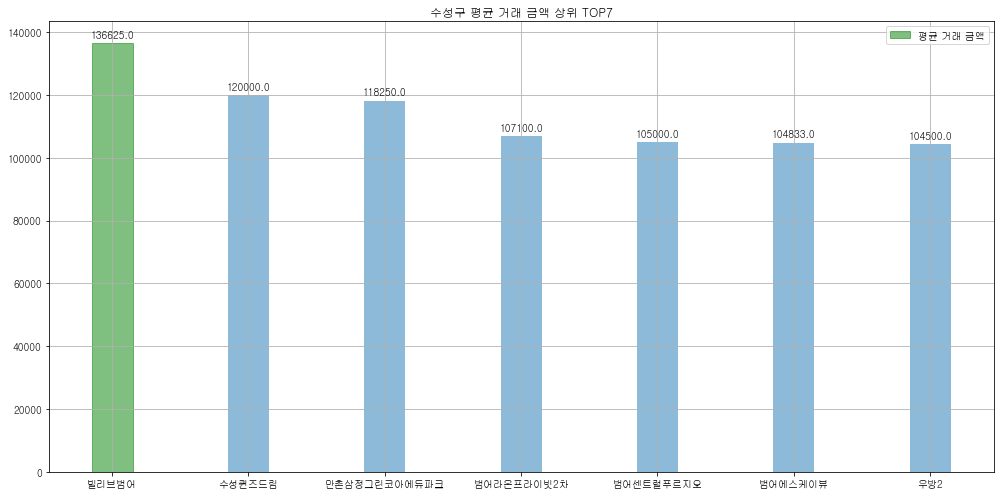

In [443]:
top7_values =list(np.ravel(soo7_up.values))

x = np.arange(len(top7_values))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 7)) #fig, ax = plt.subplots(TOTAL_X,TOTAL_Y,figsize=(8, 5))

plt.grid(b=True, which='both', axis='both')
rects1 = ax.bar(soo7_up.index, np.ravel(top7_values), width, align='center', alpha=0.5, label='평균 거래 금액')
rects1[top7_values.index(max(top7_values))].set_color('g')


ax.set_title('수성구 평균 거래 금액 상위 TOP7')
ax.set_xticks(x)
ax.set_xticklabels(soo7_up.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

plt.show()

## 2. 5-2) 수성구 하위7

In [444]:
soo7_down = soo_mean_descend[:7]
soo7_down

,거래금액(만원)
단지명,
럭키골든,19438.0
한흥아트빌,21000.0
경일라임빌,23800.0
지산파크뷰,24000.0
시지협화타운2,24100.0
지산대우로얄,24150.0
두성,24156.0


### answer

In [445]:
bottom7_values =list(np.ravel(soo7_down.values))
bottom7_values 

[19438.0, 21000.0, 23800.0, 24000.0, 24100.0, 24150.0, 24156.0]

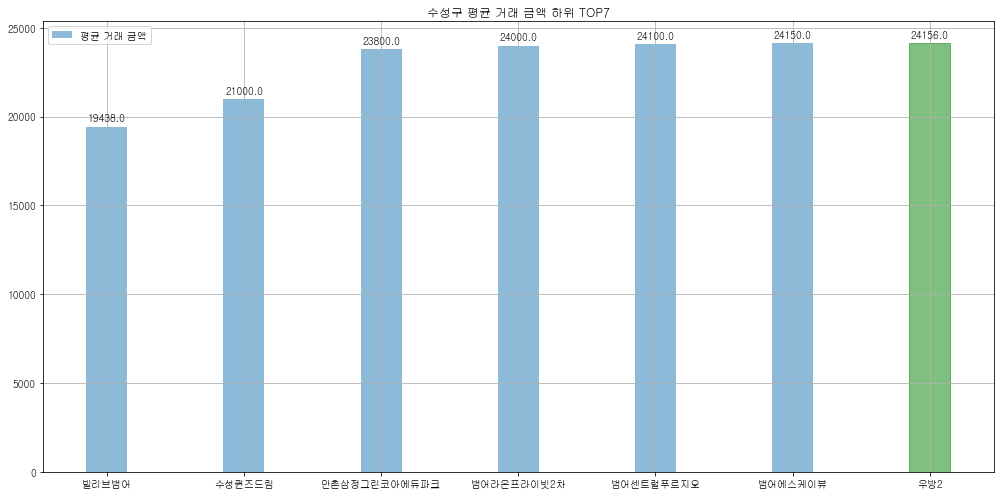

In [446]:
bottom7_values =list(np.ravel(soo7_down.values))
x = np.arange(len(bottom7_values))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 7)) #fig, ax = plt.subplots(TOTAL_X,TOTAL_Y,figsize=(8, 5))

plt.grid(b=True, which='both', axis='both')
rects1 = ax.bar(soo7_down.index, np.ravel(bottom7_values), width, align='center', alpha=0.5, label='평균 거래 금액')
rects1[bottom7_values.index(max(bottom7_values))].set_color('g')


ax.set_title('수성구 평균 거래 금액 하위 TOP7')
ax.set_xticks(x)
ax.set_xticklabels(soo7_up.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

plt.show()

## 2. 6-1) 달서구 상위7

In [447]:
dal7_up = dal_mean_ascend[:7]
dal7_up

,거래금액(만원)
단지명,
송현주공3,57053.0
삼정브리티시용산,53029.0
월성협성휴포레,52372.0
상인e-편한세상1단지,51250.0
월성e-편한세상,51080.0
상인역 모아엘가 파크뷰,51000.0
대구월배2차 아이파크,50246.0


### answer

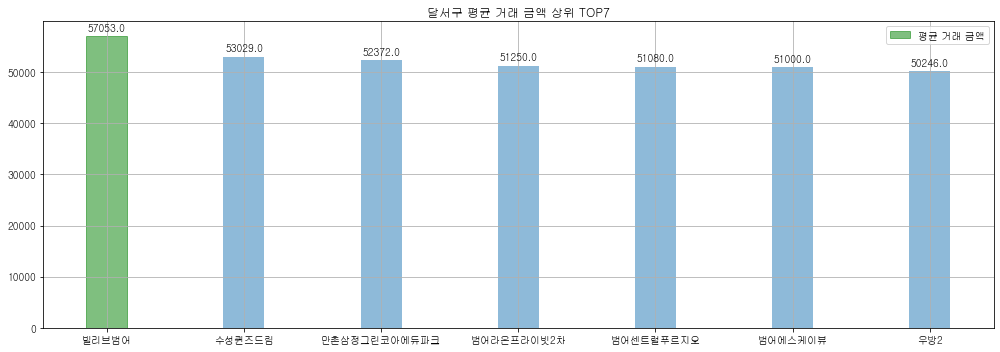

In [448]:
top7_values =list(np.ravel(dal7_up.values))
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 5)) #fig, ax = plt.subplots(TOTAL_X,TOTAL_Y,figsize=(8, 5))

plt.grid(b=True, which='both', axis='both')
rects1 = ax.bar(dal7_up.index, np.ravel(top7_values), width, align='center', alpha=0.5, label='평균 거래 금액')
rects1[top7_values.index(max(top7_values))].set_color('g')


ax.set_title('달서구 평균 거래 금액 상위 TOP7')
ax.set_xticks(x)
ax.set_xticklabels(soo7_up.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

plt.show()

## 2. 6-2) 달서구 하위7

In [449]:
dal7_down = dal_mean_descend[:7]
dal7_down

,거래금액(만원)
단지명,
현대(262-2),17550.0
원영아트빌,17600.0
정오드림타운,18500.0
삼미타운,18575.0
달맞이맨션,18600.0
트원아크로파트,18800.0
상인아트빌리지,19110.0


### answer

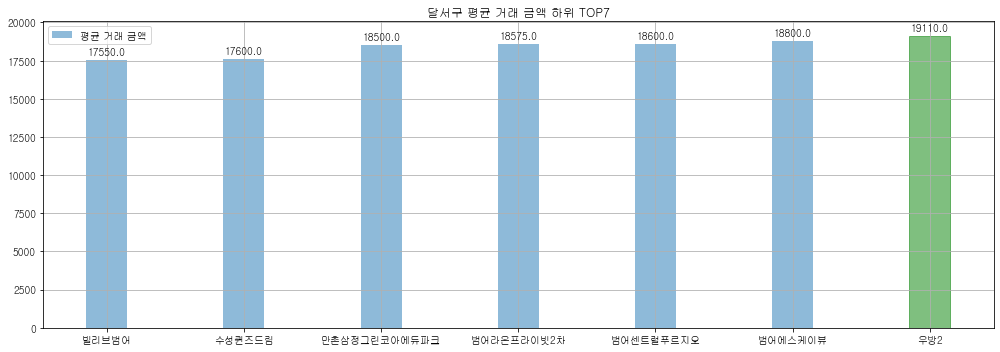

In [367]:
bottom7_values =list(np.ravel(dal7_down.values))
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 5)) #fig, ax = plt.subplots(TOTAL_X,TOTAL_Y,figsize=(8, 5))

plt.grid(b=True, which='both', axis='both')
rects1 = ax.bar(dal7_down.index, np.ravel(bottom7_values), width, align='center', alpha=0.5, label='평균 거래 금액')
rects1[bottom7_values.index(max(bottom7_values))].set_color('g')


ax.set_title('달서구 평균 거래 금액 하위 TOP7')
ax.set_xticks(x)
ax.set_xticklabels(soo7_up.index)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()

plt.show()

## 2. 7) 수성구와 달서구에서 거래량이 가장 많은 곳

#### 수성구 (수성구 모든 평수 거래 데이터)

In [397]:
soo_trade = df[df['구']=='수성구']
soo_trade

,구,동,전용면적(㎡),거래금액(만원),단지명,계약년월
5389,수성구,노변동,84,34000,노변대백,202005
5390,수성구,노변동,134,42000,노변대백,202006
5391,수성구,노변동,134,37000,노변대백,202007
5392,수성구,노변동,84,33000,노변대백,202007
5393,수성구,노변동,59,20200,노변대백,202007
...,...,...,...,...,...,...
8782,수성구,황금동,84,86300,힐스테이트황금동,202008
8783,수성구,황금동,84,84000,힐스테이트황금동,202008
8784,수성구,황금동,59,63500,힐스테이트황금동,202008
8785,수성구,황금동,84,85300,힐스테이트황금동,202008


In [399]:
soo_trade['trade'] = 1
soo_trade_count = soo_trade
soo_trade_count

<ipython-input-399-dd34c7af2c28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soo_trade['trade'] = 1


,구,동,전용면적(㎡),거래금액(만원),단지명,계약년월,trade
5389,수성구,노변동,84,34000,노변대백,202005,1
5390,수성구,노변동,134,42000,노변대백,202006,1
5391,수성구,노변동,134,37000,노변대백,202007,1
5392,수성구,노변동,84,33000,노변대백,202007,1
5393,수성구,노변동,59,20200,노변대백,202007,1
...,...,...,...,...,...,...,...
8782,수성구,황금동,84,86300,힐스테이트황금동,202008,1
8783,수성구,황금동,84,84000,힐스테이트황금동,202008,1
8784,수성구,황금동,59,63500,힐스테이트황금동,202008,1
8785,수성구,황금동,84,85300,힐스테이트황금동,202008,1


In [400]:
soo_trade_num = soo_trade_count.groupby('단지명').trade.count()
soo_trade_num

단지명
(1197-20)          1
KOASIS             1
e편한세상범어           84
가든하이츠1             3
가든하이츠2             2
                  ..
화성파크뷰              4
황금동 해피하우스 2IN1     1
황금동한화오벨리스크         3
효성백년가약궁            1
힐스테이트황금동          54
Name: trade, Length: 283, dtype: int64

### answer

In [402]:
soo_trade_num[soo_trade_num == soo_trade_num.max()]

단지명
e편한세상범어    84
Name: trade, dtype: int64

#### 달서구 (달서구 모든 평수 거래 데이터)

In [403]:
dal_trade = df[df['구']=='달서구']
dal_trade

,구,동,전용면적(㎡),거래금액(만원),단지명,계약년월
0,달서구,감삼동,58,15000,감삼맨션,202008
1,달서구,감삼동,50,19000,감삼보성청실,202004
2,달서구,감삼동,50,19800,감삼보성청실,202006
3,달서구,감삼동,76,19700,감삼빌라트,202004
4,달서구,감삼동,76,23500,감삼빌라트,202006
...,...,...,...,...,...,...
5384,달서구,호산동,59,18000,삼성한국형,202008
5385,달서구,호산동,84,28700,삼성한국형,202008
5386,달서구,호산동,59,19500,삼성한국형,202008
5387,달서구,호산동,84,28300,삼성한국형,202008


In [404]:
dal_trade['trade'] = 1
dal_trade_count = dal_trade
dal_trade_count

<ipython-input-404-6bba5d166ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dal_trade['trade'] = 1


,구,동,전용면적(㎡),거래금액(만원),단지명,계약년월,trade
0,달서구,감삼동,58,15000,감삼맨션,202008,1
1,달서구,감삼동,50,19000,감삼보성청실,202004,1
2,달서구,감삼동,50,19800,감삼보성청실,202006,1
3,달서구,감삼동,76,19700,감삼빌라트,202004,1
4,달서구,감삼동,76,23500,감삼빌라트,202006,1
...,...,...,...,...,...,...,...
5384,달서구,호산동,59,18000,삼성한국형,202008,1
5385,달서구,호산동,84,28700,삼성한국형,202008,1
5386,달서구,호산동,59,19500,삼성한국형,202008,1
5387,달서구,호산동,84,28300,삼성한국형,202008,1


In [408]:
dal_trade_num = dal_trade_count.groupby('단지명').trade.count()
dal_trade_num

단지명
가람마을       39
가온씨티플러스     9
감삼맨션        1
감삼보성청실      2
감삼빌라트       2
           ..
현대백조타운     30
현대아이파크     81
화성맨션       11
화정리치빌       2
황실          6
Name: trade, Length: 288, dtype: int64

 ### answer

In [409]:
dal_trade_num[dal_trade_num == dal_trade_num.max()]

단지명
대구월배2차 아이파크    172
Name: trade, dtype: int64